## PRODIGY_TAXK_04


## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from nltk.tokenize import sent_tokenize,woed_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [7]:
Data=pd.read_csv('twitter_training.csv')
v_data=pd.read_csv('twitter_validation.csv')


In [15]:
Data.columns=['Id','game','sentimate','text']
v_data.columns=['Id','game','sentimate','text']

In [16]:
Data

,Id,game,sentimate,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [17]:
v_data

,Id,game,sentimate,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


## Exploratory Data Analysis

In [18]:
Data.shape

(74681, 4)

In [19]:
Data.columns

Index(['Id', 'game', 'sentimate', 'text'], dtype='object')

In [20]:
Data.describe(include='all')

,Id,game,sentimate,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [21]:
Id_types=Data['Id'].value_counts()
print(Id_types)

Id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64


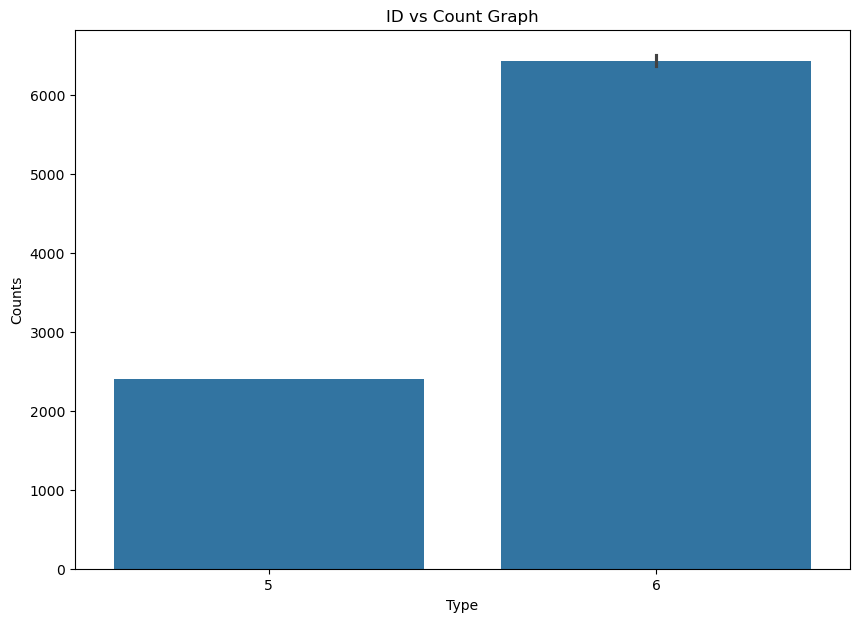

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(y=Id_types.index,x=Id_types.values)
plt.xlabel("Type")
plt.ylabel("Counts")
plt.title("ID vs Count Graph")
plt.show()
           

In [24]:
game_types=Data['game'].value_counts()
print(game_types)

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

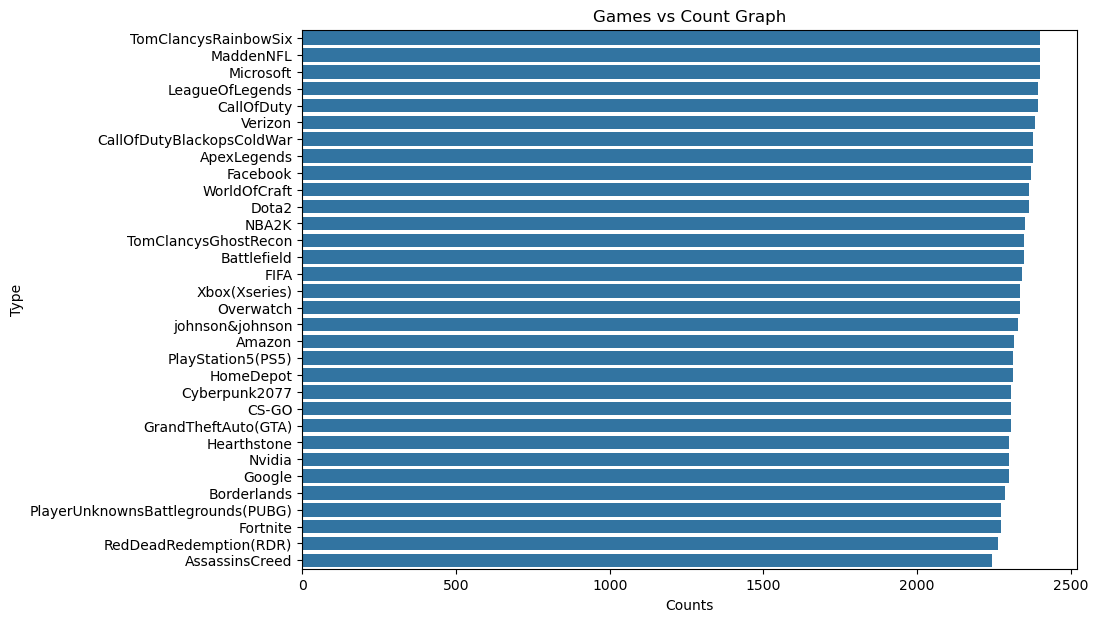

In [27]:
plt.figure(figsize=(10,7))
sns.barplot(y=game_types.index,x=game_types.values)
plt.ylabel("Type")
plt.xlabel("Counts")
plt.title("Games vs Count Graph")
plt.show()

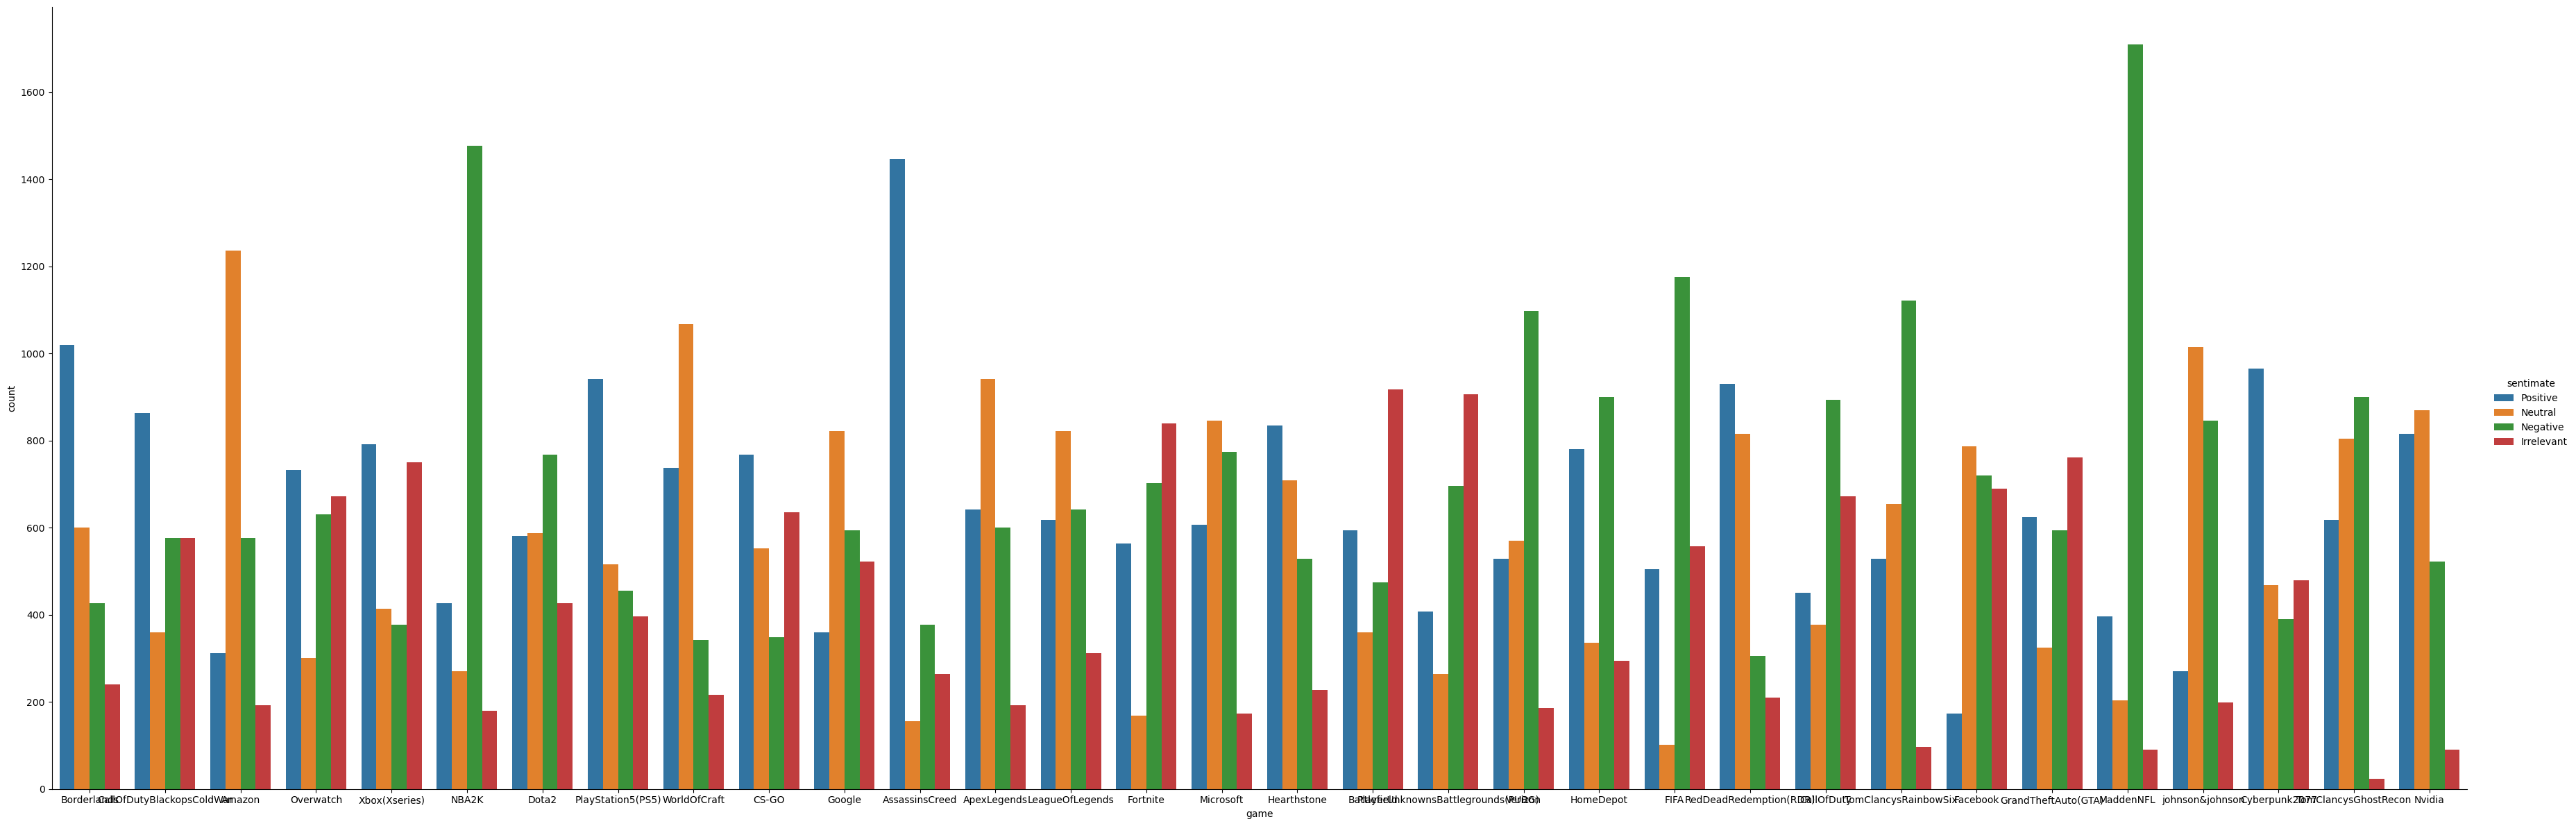

In [29]:
sns.catplot(x='game',hue='sentimate',kind='count',height=12,aspect=3,data=Data)


<Axes: >

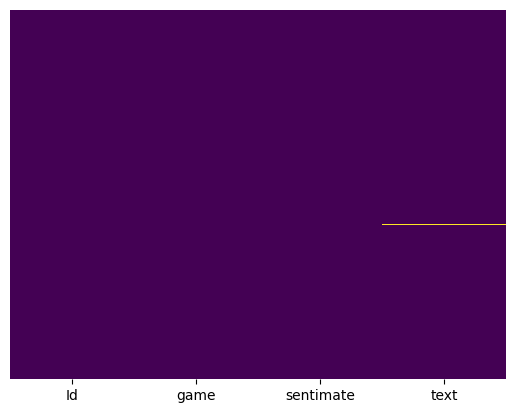

In [32]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
total_null=Data.isnull().sum().sort_values(ascending=False)
percent=((Data.isnull().sum()/Data.isnull().count())*100).sort_values(ascending=False)
print("Total records=",Data.shape[0])
missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['Total missing','In Percent'])
missing_data.head(10)

Total records= 74681


,Total missing,In Percent
text,686,0.92
Id,0,0.00
game,0,0.00
sentimate,0,0.00


## Missing Values Analysis

In [36]:
Data.dropna(subset=['text'],inplace=True)
total_null=v_data.isnull().sum().sort_values(ascending=False)
percent=((v_data.isnull().sum()/v_data.isnull().count())*100).sort_values(ascending=False)
print("Total records=",v_data.shape[0])
missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['Total missing','In Percent'])
missing_data.head(10)

Total records= 999


,Total missing,In Percent
Id,0,0.0
game,0,0.0
sentimate,0,0.0
text,0,0.0


In [37]:
train0=Data[Data['sentimate']=="Negative"]
train1=Data[Data['sentimate']=="Positive"]
train2=Data[Data['sentimate']=="Irrevant"]
train3=Data[Data['sentimate']=="Neutral"]

In [38]:
train0.shape,train1.shape,train2.shape,train3.shape

((22358, 4), (20654, 4), (0, 4), (18108, 4))

In [41]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [42]:
Data=pd.concat([train0,train1,train2,train3],axis=0)
Data

,Id,game,sentimate,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [43]:
id_types=Data['Id'].value_counts()
print(id_types)

Id
2405    6
1875    6
1811    6
1812    6
1816    6
       ..
134     3
42      3
1719    3
1880    3
9388    2
Name: count, Length: 858, dtype: int64


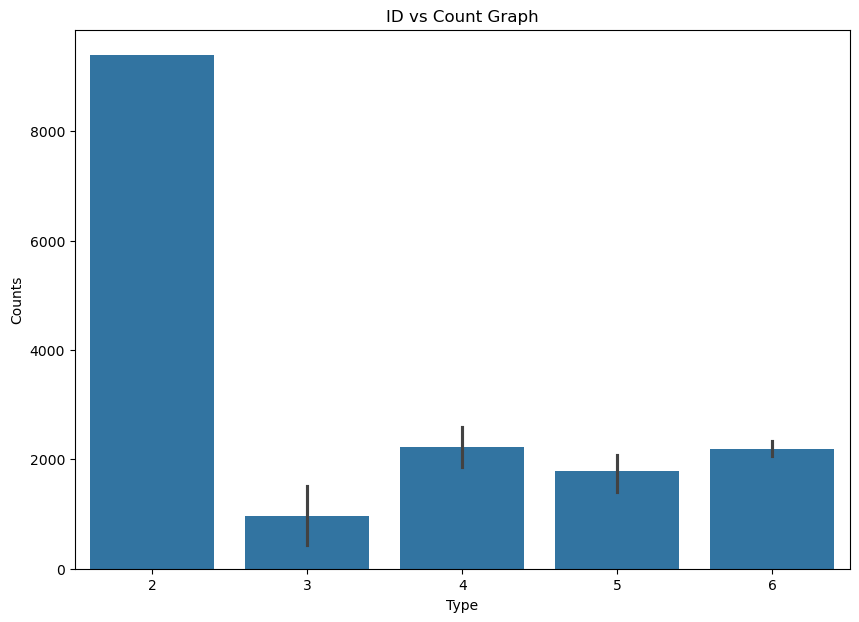

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(y=id_types.index,x=id_types.values)
plt.xlabel("Type")
plt.ylabel("Counts")
plt.title("ID vs Count Graph")
plt.show()
           

In [45]:
game_types=Data['game'].value_counts()
print(game_types)

game
Borderlands                  2039
CallOfDutyBlackopsColdWar    1623
Amazon                       1135
Overwatch                     296
Name: count, dtype: int64


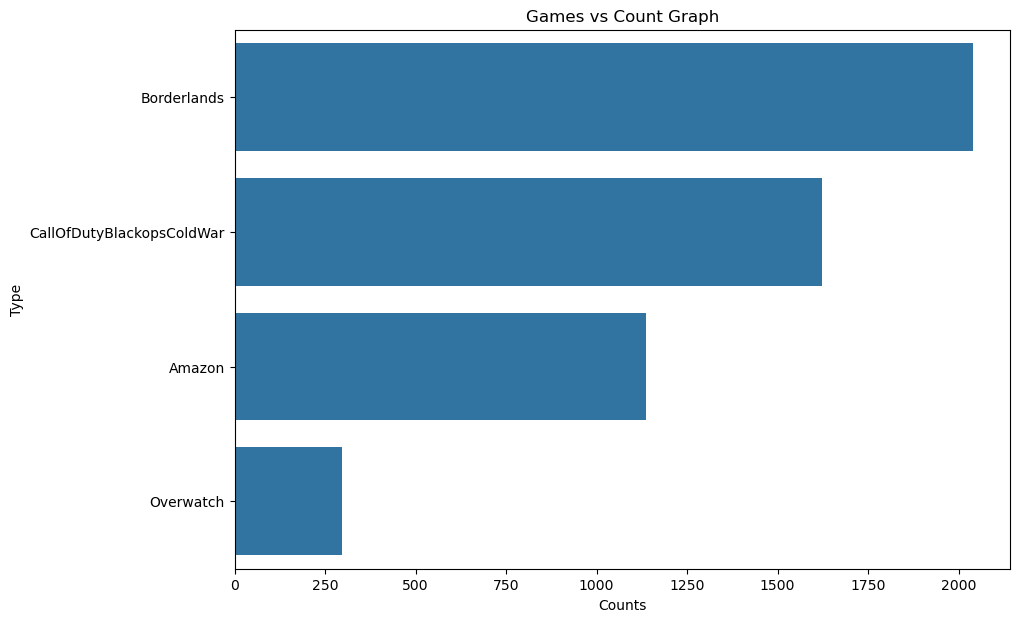

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(y=game_types.index,x=game_types.values)
plt.ylabel("Type")
plt.xlabel("Counts")
plt.title("Games vs Count Graph")
plt.show()

In [48]:
sentimate_types=Data['sentimate'].value_counts()
print(sentimate_types)

sentimate
Negative    1863
Positive    1721
Neutral     1509
Name: count, dtype: int64


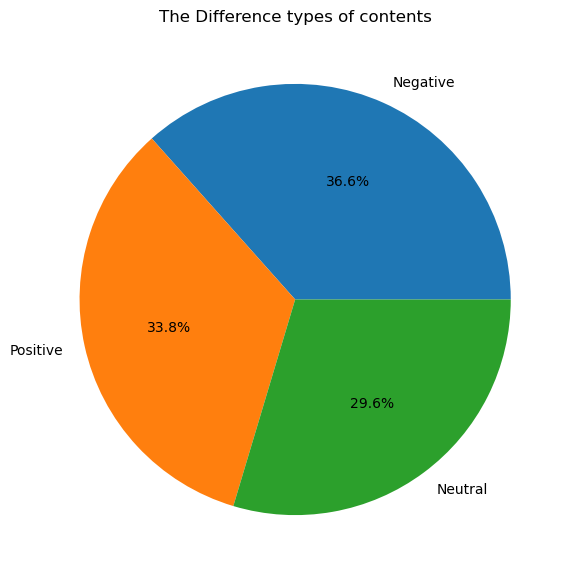

In [54]:
plt.figure(figsize=(12,7))
plt.pie(x=sentimate_types.values,labels=sentimate_types.index,autopct='%.1f%%')
plt.title("The Difference types of contents")
plt.show()

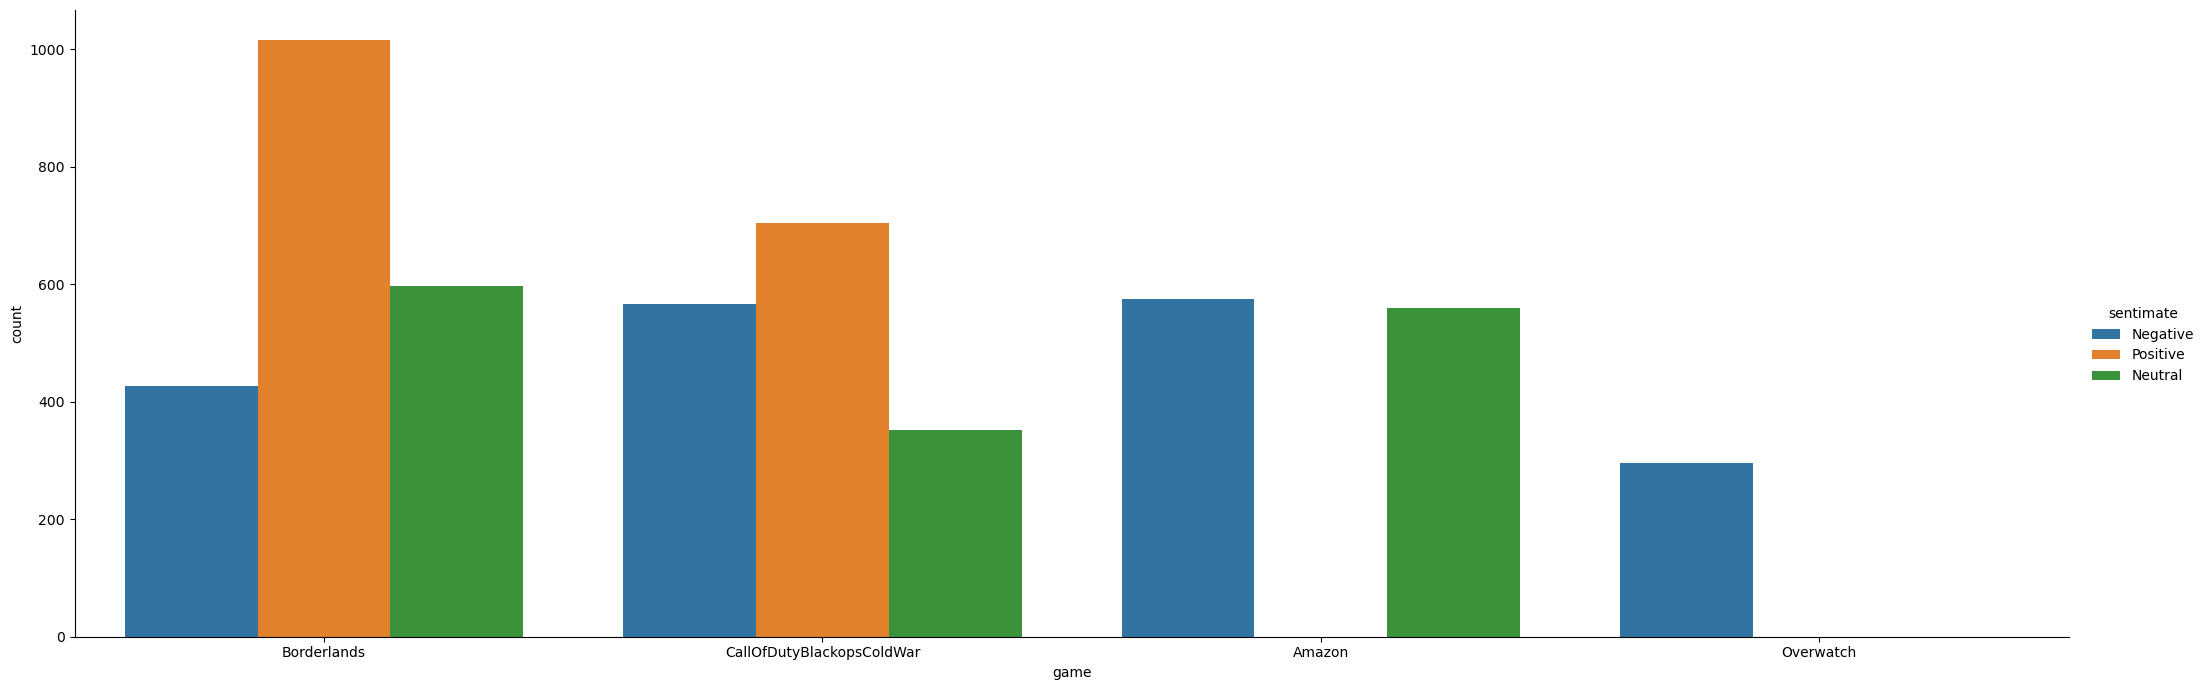

In [56]:
sns.catplot(x='game',hue='sentimate',kind='count',height=7,aspect=3,data=Data)

In [57]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [58]:
Data['sentimate']=label_encoder.fit_transform(Data['sentimate'])
Data['game']=label_encoder.fit_transform(Data['game'])
v_data['sentimate']=label_encoder.fit_transform(v_data['sentimate'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [59]:
Data=Data.drop(['Id'],axis=1)
Data

,game,sentimate,text
23,1,0,the biggest dissappoinment in my life came out...
24,1,0,The biggest disappointment of my life came a y...
25,1,0,The biggest disappointment of my life came a y...
26,1,0,the biggest dissappoinment in my life coming o...
27,1,0,For the biggest male dissappoinment in my life...
...,...,...,...
5603,0,1,An amazing read aloud book for you and your ch...
5604,0,1,An amazing reading book for you and your child...
5605,0,1,An amazing book to read aloud for you and your...
5606,0,1,An amazing read aloud book for you and your ch...


In [60]:
Data.nunique()

game            4
sentimate       3
text         4844
dtype: int64